# 3.2. Converting a Jupyter notebook to other formats with nbconvert

In [1]:
import io
import requests

In [2]:
url = ('https://github.com/ipython-books/'
       'cookbook-2nd-data/blob/master/'
       'test.ipynb?raw=true')

In [3]:
contents = requests.get(url).text
print(len(contents))

3857


In [4]:
print(contents[:345] + '...' + contents[-33:])

{
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "# First chapter"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {
    "my_field": [
     "value1",
     "2405"
    ]
   },
   "source": [
    "Let's write some *rich* **text** with
        [links](http://www.ipython.org) and lists:\n",
    "\n",
    "* item1...rmat": 4,
 "nbformat_minor": 4
}


In [5]:
import json
nb = json.loads(contents)

In [6]:
print(nb.keys())
print('nbformat %d.%d' % (nb['nbformat'],
                          nb['nbformat_minor']))

dict_keys(['cells', 'metadata',
           'nbformat', 'nbformat_minor'])
nbformat 4.4


In [7]:
nb['cells'][1]

{'cell_type': 'markdown',
 'metadata': {'my_field': ['value1', '2405']},
 'source': ["Let's write some *rich* **text** with
        [links](http://www.ipython.org) and lists:\n",
  '\n',
  '* item1\n',
  '* item2\n',
  '    1. subitem\n',
  '    2. subitem\n',
  '* item3']}

In [8]:
nb['cells'][2]

{'cell_type': 'code',
 'execution_count': 1,
 'metadata': {},
 'outputs': [{'data': {'image/png': 'iVBOR...QmCC\n',
    'text/plain': ['<matplotlib Figure at ...>']},
   'metadata': {},
   'output_type': 'display_data'}],
 'source': ['import numpy as np\n',
  'import matplotlib.pyplot as plt\n',
  '%matplotlib inline\n',
  'plt.figure(figsize=(2,2));\n',
  "plt.imshow(np.random.rand(10,10),
              interpolation='none');\n",
  "plt.axis('off');\n",
  'plt.tight_layout();']}

In [9]:
cells = nb['cells']
nm = len([cell for cell in cells
          if cell['cell_type'] == 'markdown'])
nc = len([cell for cell in cells
          if cell['cell_type'] == 'code'])
print((f"There are {nm} Markdown cells and "
       f"{nc} code cells."))

There are 2 Markdown cells and 1 code cells.


In [10]:
cells[2]['outputs'][0]['data']

{'image/png': 'iVBOR...QmCC\n',
 'text/plain': ['<matplotlib.figure.Figure at ...>']}

In [11]:
# We write the notebook to a file on disk.
with open('test.ipynb', 'w') as f:
    f.write(contents)

In [12]:
!jupyter nbconvert --to html test.ipynb

[NbConvertApp] Converting notebook test.ipynb to html
[NbConvertApp] Writing 253784 bytes to test.html


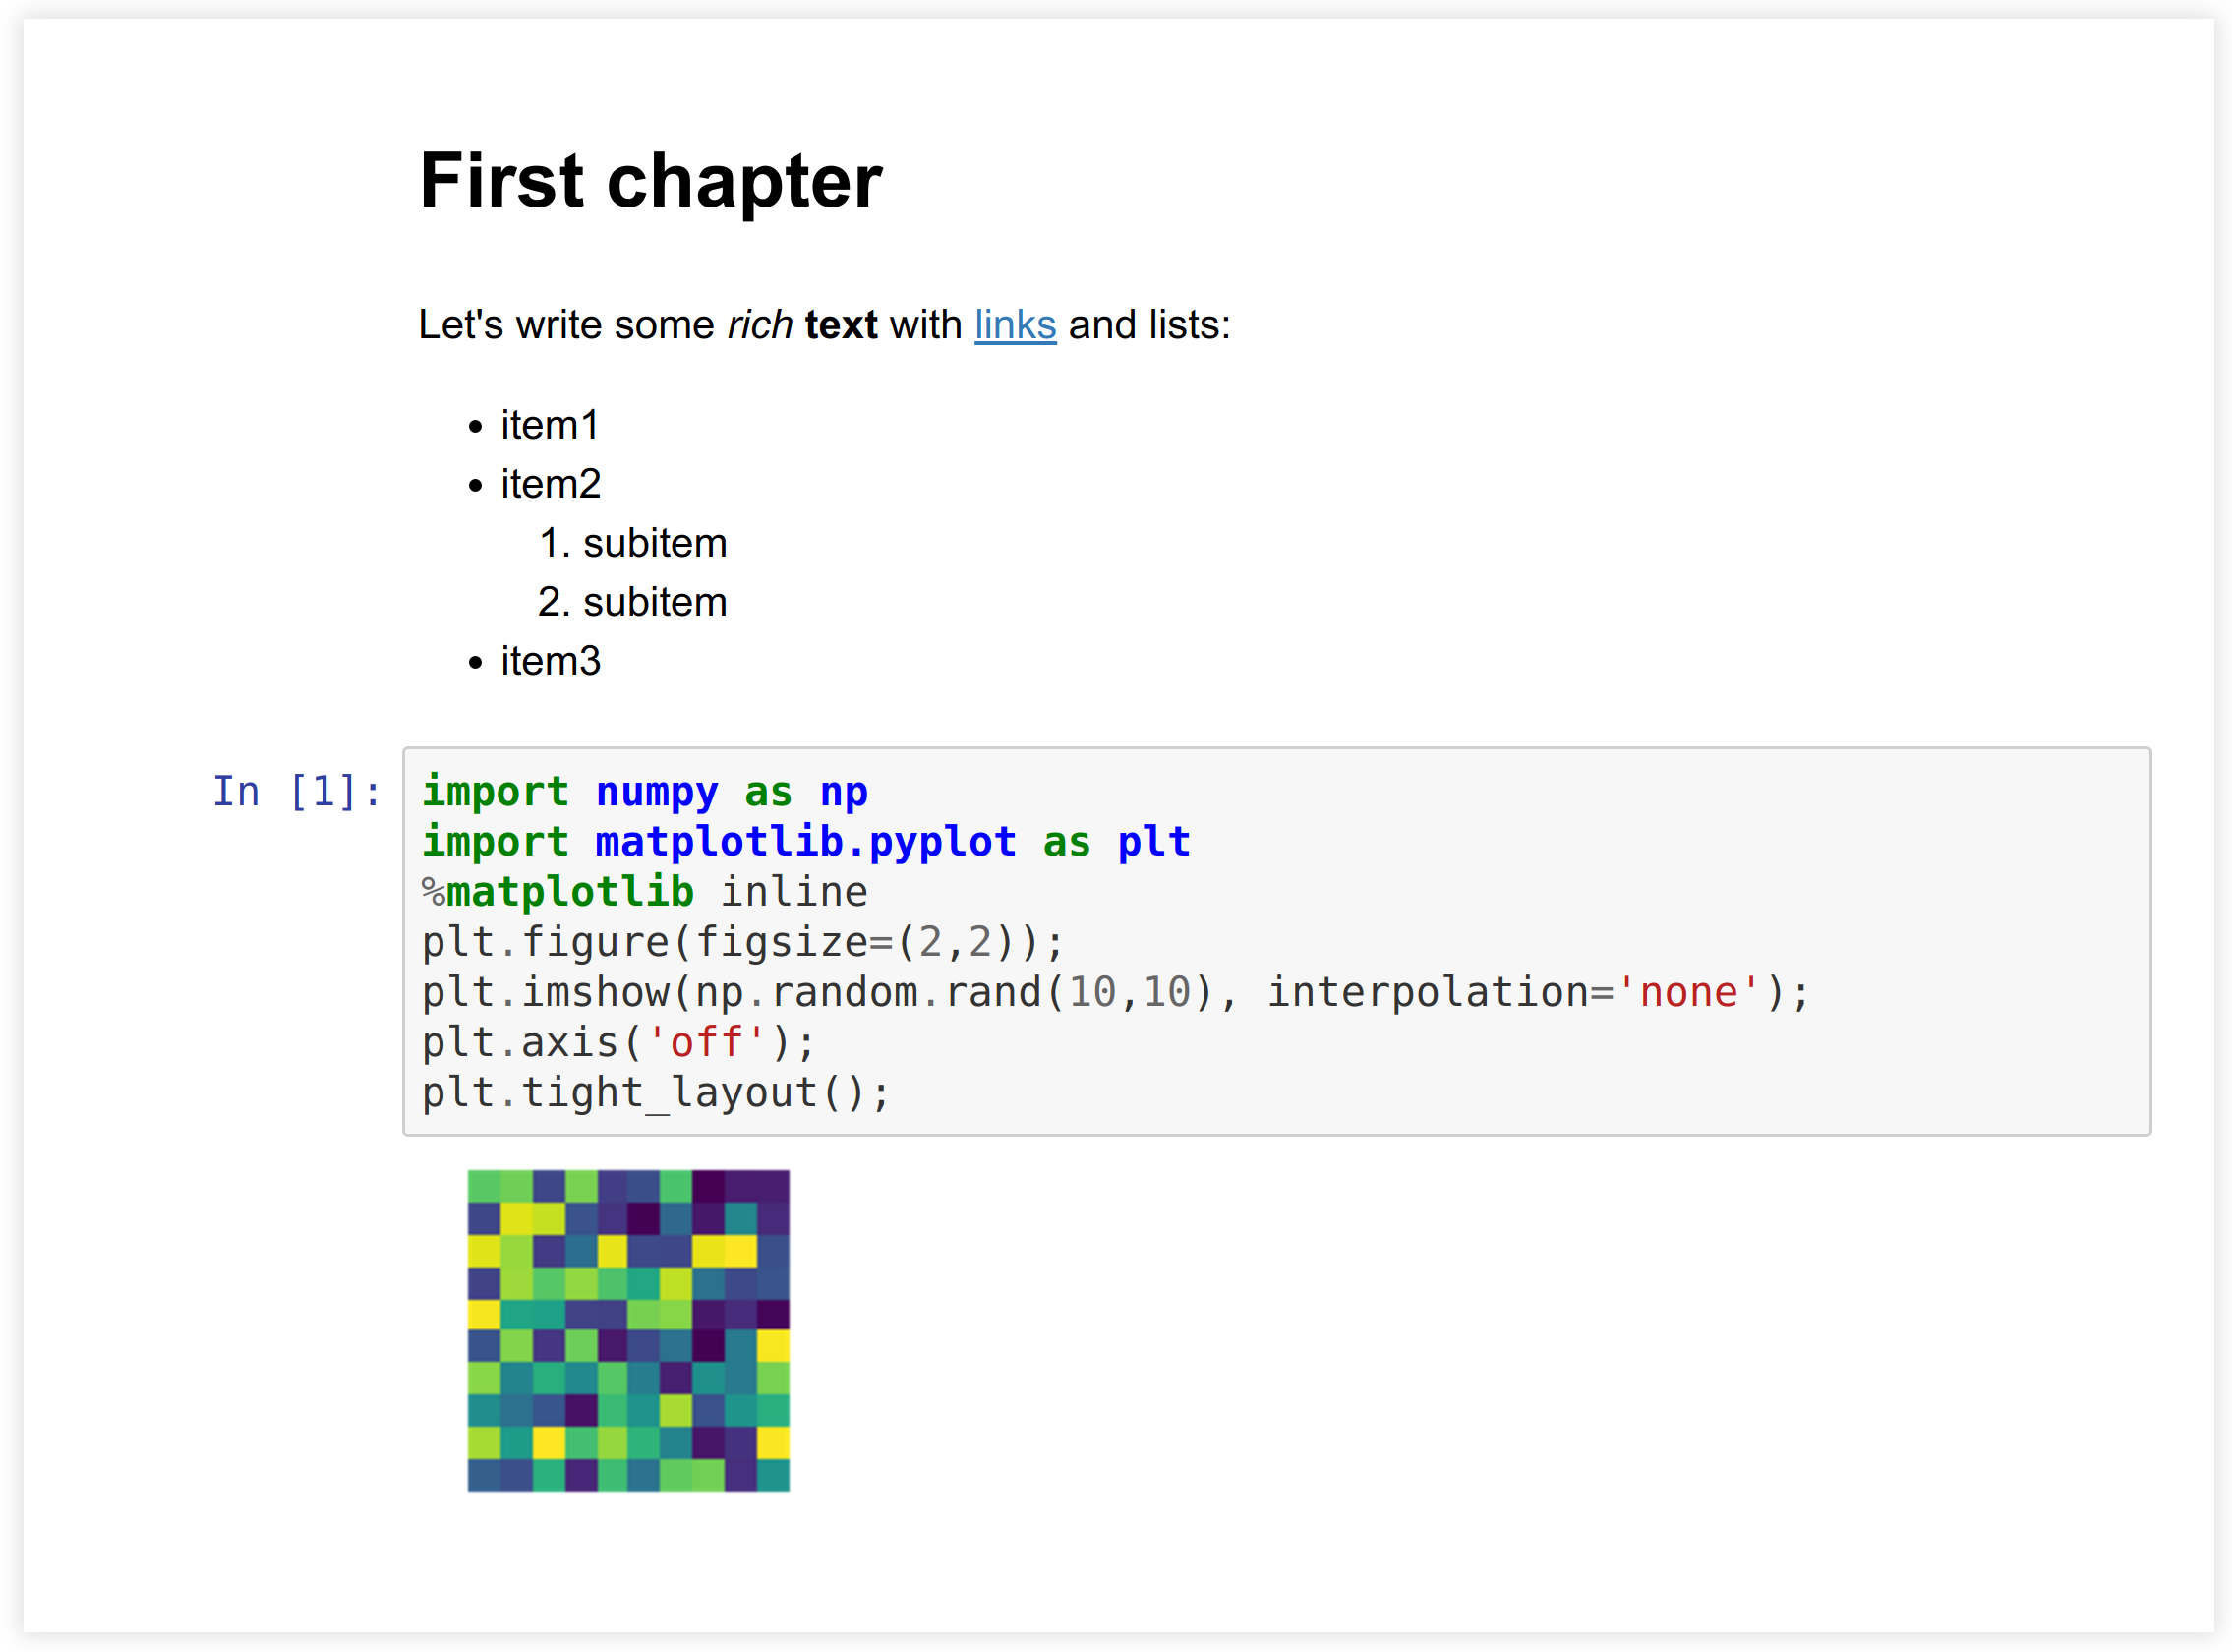

In [13]:
from IPython.display import IFrame
IFrame('test.html', 600, 200)

In [14]:
%%writefile temp.tplx
((*- extends 'article.tplx' -*))

((* block author *))
\author{Cyrille Rossant}
((* endblock author *))

((* block title *))
\title{My document}
((* endblock title *))

Writing temp.tplx


In [15]:
%%bash
jupyter nbconvert --to pdf --template temp test.ipynb

[NbConvertApp] Converting notebook test.ipynb to pdf
[NbConvertApp] Support files will be in test_files/
[NbConvertApp] Making directory test_files
[NbConvertApp] Writing 16695 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times:
    ['xelatex', 'notebook.tex']
[NbConvertApp] Running bibtex 1 time:
    ['bibtex', 'notebook']
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 16147 bytes to test.pdf
